# Instrucciones
* Realiza la siguiente simulación:
    * Inicializa las posiciones iniciales de las K cajas. Todas las cajas están a nivel de piso, es decir, no hay pilas de cajas.
    * Todos los agentes empiezan en posición aleatorias vacías.
    * Se ejecuta el tiempo máximo establecido.
* Deberás recopilar la siguiente información durante la ejecución:
    * Tiempo necesario hasta que todas las cajas están en pilas de máximo 5 cajas.
    * Número de movimientos realizados por todos los robots.
    * Analiza si existe una estrategia que podría disminuir el tiempo dedicado, así como la cantidad de movimientos realizados. ¿Cómo sería? Descríbela.

## Imports
Se utilizaran los siguientes paquetes de python
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para instalar mesa hay que hay que utilizar el siguiente comando:

In [1]:
!pip install mesa

You should consider upgrading via the 'c:\users\luis\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora importamos las librerias y funciones a utilizar.

In [2]:
# Importamos las clases para manejar el modelo y agente.
from mesa import Agent, Model 

# Utilizamos Multigrid para poder manejar varios agentes.
from mesa.space import MultiGrid

# Activamos a todos los agentes a la vez.
from mesa.time import RandomActivation

# Obtenemos la información completa del grid para poder graficarlo.
from mesa.datacollection import DataCollector

# Esta libreria se utilizara en conjunto con data collector para graficar el grid.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Librerias para manejar operaciones numericas.
import numpy as np
import pandas as pd
import random
# librerias para obtener el tiempo de ejecucion.
import time
import datetime

## Crea el modelo

In [3]:
def obtener_habitacion(model):
    habitacion = np.zeros((model.grid.width, model.grid.height))
    for celda in model.grid.coord_iter():
        contenido_celda, x, y = celda
        for contenido in contenido_celda:
            if isinstance(contenido, Robot):
                habitacion[x][y] = 5
            elif isinstance(contenido, Caja):    
                habitacion[x][y] = 6
            elif isinstance(contenido, Stack):
                habitacion[x][y] = contenido.estado
    return habitacion

class Robot(Agent):
    '''
    Agente robot
    '''
    def __init__(self,unique_id, model):
        super().__init__(unique_id, model)
        self.estado = 5
        self.carga = False

    '''
    Movimiento
    '''
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
    
    def interaccion(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            for mate in cellmates:
                if mate.estado = 2 and not mate.stacked and not self.carga:
                    self.carga = true
                    mate.robot = true

    '''
    Llevar la caja al stack
    '''
    def moverCaja(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = 

    def step(self):
        if self.carga:
            moverCaja()
        else:
            self.move()
            self.interaccion()

    
    
class Caja(Agent):
    '''
    Agente caja
    '''

    def __init__(self,unique_id,model):
        super().__init__(unique_id,model)
        self.estado = 6
        self.stacked = False
        self.robot = False
        self.newPos = (0,0)

    def interaccion(self,(x,y)):

    def step():
        if self.robot:
            interaccion()

class Stack(Agent):
    '''
    Agente Stack
    '''

    def __init__(self,unique_id,model):
        super().__init__(unique_id, model)
        self.estado = None
        self.cantidad = 

class cajasModel(Model):
    def __init__(self, N, width, height):
        self.cajas = N
        self.cajasApiladas = 0
        self.stack = (0,0)
        self.grid = MultiGrid(width, height, False)
        self.schedule = RandomActivation(self)

        for i in range(5):
            r = Robot(i,self)
            self.schedule.add(r)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(r, (x, y))
        
        for i in range(N):
            r = Caja(i+5,self)
            self.schedule.add(r)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(r, (x, y))

        # Aquí definimos con colector para obtener el grid completo.
        self.datacollector = DataCollector(model_reporters={"Grid": obtener_habitacion})

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

## Tiempo de ejecucion

In [4]:
# Numero de cajas
NUM_CAJAS = 10

# Definimos el tiempo maximo del modelo
MAX_TIME = 0.01

# Definimos el tamaño del Grid
GRID_SIZE = 10

start_time = time.time()
step_num = 0
modelo = cajasModel(NUM_CAJAS, GRID_SIZE, GRID_SIZE)
while time.time()-start_time <= MAX_TIME:
    modelo.step()
    step_num += 1
final_time = time.time()

print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(time.time() - start_time))))

Tiempo de ejecución: 0:00:00.010969


## Graficar

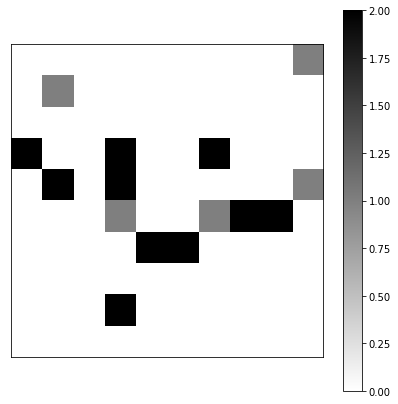

In [5]:
all_grid = modelo.datacollector.get_model_vars_dataframe()

# %%capture

fig, axs = plt.subplots(figsize=(7,7))
axs.set_xticks([])
axs.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.binary)
plt.colorbar()

def animate(i):
    patch.set_data(all_grid.iloc[i][0])
    
anim = animation.FuncAnimation(fig, animate, frames=step_num)

In [6]:
anim